In [26]:
import numpy as np
path_name1 = 'ETTm1_96_96_Autoformer_ETTm1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtFalse_Exp_0'
path_name2 = 'ETTm1_Informer_random_modes64_ETTm1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtFalse_Exp_0'
path_name3 = 'ETTm1_Transformer_random_modes64_ETTm1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtFalse_Exp_0'
path_name4 = 'ETTm1_FEDformer_random_modes64_ETTm1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtFalse_Exp_0'
pre_A = np.load(f'../results/{path_name1}/pred.npy')
pre_I = np.load(f'../results/{path_name2}/pred.npy')
pre_T = np.load(f'../results/{path_name3}/pred.npy')
pre_F = np.load(f'../results/{path_name4}/pred.npy')
true_arr = np.load(f'../results/{path_name3}/true.npy')

err_A = np.load(f'../results/{path_name1}/metrics.npy')
err_I = np.load(f'../results/{path_name2}/metrics.npy')
err_T = np.load(f'../results/{path_name3}/metrics.npy')
err_F = np.load(f'../results/{path_name4}/metrics.npy')

In [31]:
err_A.mean(), err_I.mean(), err_T.mean(), err_F

(73.946075,
 64.19217,
 34.65683,
 array([3.4049842e-01, 2.7030775e-01, 5.1991129e-01, 2.1232789e+00,
        2.7601669e+02], dtype=float32))

In [3]:
pre_A.shape, pre_I.shape, pre_T.shape, pre_F.shape, true_arr.shape

((11497, 24, 7),
 (11488, 24, 7),
 (11488, 24, 7),
 (11488, 24, 7),
 (11488, 24, 7))

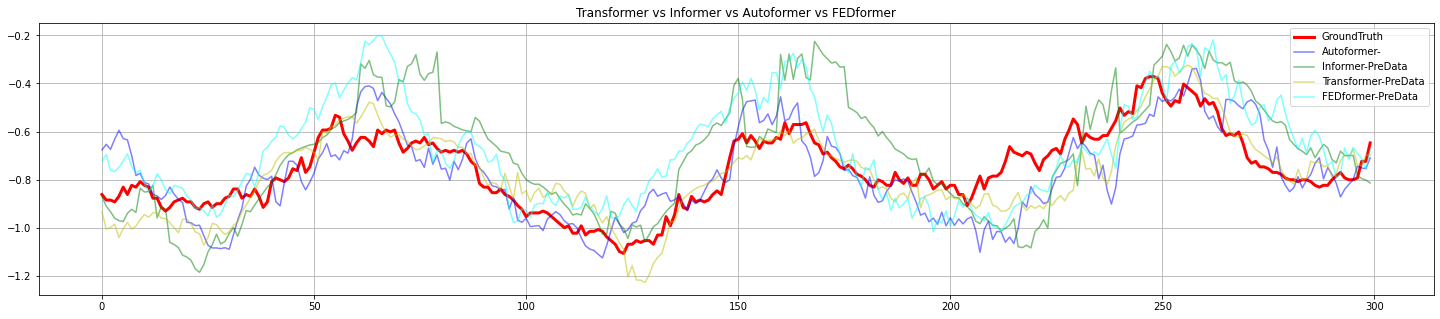

In [34]:
import matplotlib.pyplot as plt

r_bord = 300
alpha = 0.5
save_path = '../my_tools/result_pic/'
save_name = f'2023-11-09_r_bord={r_bord}.png'

plt.figure(figsize=(25, 5))
plt.grid(True)
plt.title('Transformer vs Informer vs Autoformer vs FEDformer')
plt.plot(true_arr[:r_bord, 0,-1], label='GroundTruth', color='r', linewidth=3)
plt.plot(pre_A[:r_bord, 0,-1], label='Autoformer-', color='b', alpha=alpha)
plt.plot(pre_I[:r_bord, 0,-1], label='Informer-PreData', color='g', alpha=alpha)
plt.plot(pre_T[:r_bord, 0,-1], label='Transformer-PreData', color='y', alpha=alpha)
plt.plot(pre_F[:r_bord, 0,-1], label='FEDformer-PreData', color='cyan', alpha=alpha)
plt.legend()
plt.savefig(save_path+save_name)